In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Activation, Dense
import keras
# from tensorflow.keras import Flatten

In [ ]:
import cv2
vidcap = cv2.VideoCapture('raw_data/final.mp4')
success,image = vidcap.read()
count = 0
success = True
while success:
  success,image = vidcap.read()
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file
  #print('Read a new frame: ', success)
  count += 1
  
else:
  pass

In [10]:
img_height,img_width=180,180
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "train",
  validation_split=0.1,
  subset="training",
  seed=123,
  label_mode='categorical' ,
  # horizontal_flip,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3907 files belonging to 3 classes.
Using 3517 files for training.


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
  validation_split=0.1,
  subset="validation",
  seed=123,
  label_mode='categorical' ,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3907 files belonging to 3 classes.
Using 390 files for validation.


In [12]:
class_names=train_ds.class_names
print(class_names)

['final', 'initial', 'medium']


In [19]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(tf.keras.layers.Flatten())

resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

In [20]:
resnet_model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
model = resnet_model.fit(train_ds, validation_data=val_ds, epochs=2)

Epoch 1/2
110/110 [==============================] - 245s 2s/step - loss: 0.0568 - accuracy: 0.9957 - val_loss: 8.4942e-07 - val_accuracy: 1.0000
Epoch 2/2
110/110 [==============================] - 243s 2s/step - loss: 2.1496e-07 - accuracy: 1.0000 - val_loss: 3.2706e-08 - val_accuracy: 1.0000


In [32]:
from matplotlib import pyplot as plt
import numpy as np

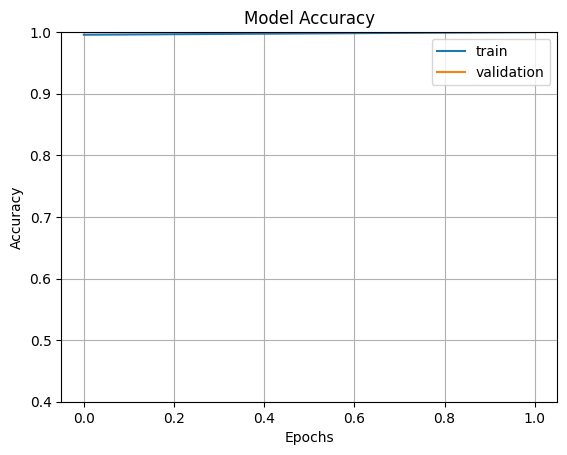

In [33]:
fig1 = plt.gcf()
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [49]:

test_image=tf.keras.utils.load_img('test.jpg',target_size=(180,180))
test_image=tf.keras.utils.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
pred=resnet_model.predict(test_image)
output_class=class_names[np.argmax(pred)]
print(output_class)

1/1 [==============================] - 0s 163ms/step
final


In [48]:
test_image=tf.keras.utils.load_img('val/not_ripe/OIP.jpeg',target_size=(180,180))
test_image=tf.keras.utils.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
pred=resnet_model.predict(test_image)
output_class=class_names[np.argmax(pred)]
print(output_class)

1/1 [==============================] - 0s 148ms/step
medium
